In [1]:
import pytearcat as pt

In [3]:
# Define the coordinates to be used
t,x,y,z = pt.def_coords('t,x,y,z')
# Define any constant (more than one constant can be defined at the same time)
a = pt.new_fun('a','t')
g = pt.create_metric('ds2 = -dt**2 + a**2*(dx**2 + dy**2 + dz**2)')

Remember that the time coordinate must be the first coordinate.
Function a(t) is already defined
The metric has already been defined. Do you want to overwrite it? (yes/no)y
The metric has been redefined. Standard tensors have been deleted.
en metric: t,x,y,z

Dimension = 4
Coordinates = t,x,y,z
Metric was defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-1,       0,       0,       0],
[ 0, a(t)**2,       0,       0],
[ 0,       0, a(t)**2,       0],
[ 0,       0,       0, a(t)**2]])

<IPython.core.display.Latex object>

  0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

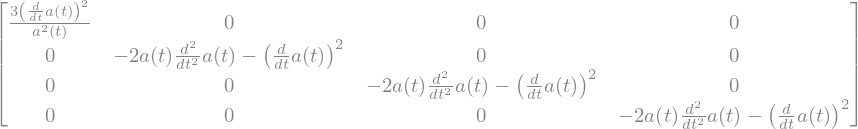

In [5]:
# To calculate the default combination of the Einstein Tensor, i.e., (_,_):
G = pt.einstein()

# To calculate all the combinations:
# G = pt.einstein(All = True)

# To display the Einstein Tensor:
G.display()

# To show the tensor components as a list:
# G.display(aslist = True)

The display method uses matrix notation for all tensors with rank $\leq$ 2 by default. To display the tensor components as a list, the user must include the "aslist = True" argument.

In [6]:
# To define an arbitrary tensor, indicating the name and rank of the tensor.
U = pt.new_ten('U',1)
# To assign a list or array (even numpy arrays) to a particular component of the tensor.
U.assign([1,0,0,0],'^')
# Display the tensor, or vector in this particular example.
U.display('^')

Elements assigned correctly to the components ^


Note that pytearcat uses the definition of "vectors" as Columns, and "one-forms" as Rows. 

- A 1-vector is a Tensor with one contravariant index $A^{\mu}$.

- A 1-form is a Tensor with one covariant index $A_{\mu}$.

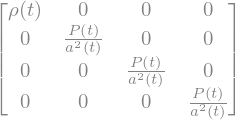

In [7]:
rho = pt.new_fun('rho','t')
P = pt.new_fun('P','t')

T = pt.new_ten('T',2)

T.assign((rho+P)*U("^mu")*U("^nu")+P*g("^mu,^nu"),"^mu,^nu")

# One could also save the result of a tensor operation in a variable
# For example: T_value = (rho+P/c**2)*U("^mu")*U("^nu")-P*g("^mu,^nu")
# And then, to assing that value to the tensor: 
# T.assign(T_value,'^mu,^nu')

T.display('^,^')

T Tensor $T{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

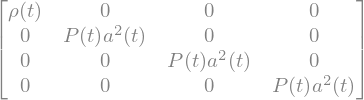

In [8]:
# To calculate the rest of index combinations of the tensor:
T.indexcomb('^,^')
T.display('_,_')

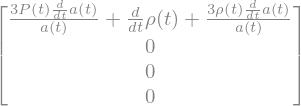

In [12]:
CT_dat = pt.C(T('^mu,^nu'),'_nu')

CT = pt.new_ten('CT',1)

CT.assign(CT_dat,'^mu')

CT.display('^')

The conservation equation is obtained by computing the covariant derivative of the Energy-Momentum Tensor 

$$\nabla_\nu T^{\mu\nu}=0$$

Replacing $P = \omega\rho$ one obtains:

$$ \dot{\rho} + 3\, H(1+\omega)\rho = 0 $$